In [1]:
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
import tensorflow as tf


In [2]:
# 预处理输入数据
def preprocessing(nmp_df,power_df):
    nmp_df.head(10)
    power_df.head(10)
    fix_df=pd.merge(nmp_df, power_df, on=['Datetime'], how='left')
    fix_df.head(10)
    fix_df.describe()

    return fix_df

In [3]:
# 读取数据
his_nmp_fd_df = pd.read_csv('.\\data\\FD001\\03 His_NWP_FD.csv',parse_dates=["Datetime"],index_col=[0])
his_power_fd_df = pd.read_csv('.\\data\\FD001\\02_His_Power_FD.csv',parse_dates=["Datetime"],index_col=[0])
his_fd_df=preprocessing(his_nmp_fd_df,his_power_fd_df)
his_fd_df.to_csv('his_df.csv',encoding = 'utf-8') #存储合并后数据

In [4]:
df=pd.read_csv('his_df.csv',parse_dates=["Datetime"],index_col=[0])
df.head()

,Speed10,Direction10,Speed30,Direction30,Speed50,Direction50,Speed70,Direction70,Speed90,Direction90,Speed100,Direction100,Temper,Pressure,Humidity,Power(MW)
Datetime,,,,,,,,,,,,,,,,
2022-07-15 00:00:00,3.3696,290.3172,4.1829,295.0334,4.9253,297.9698,5.6139,300.0360,6.2446,301.5774,6.5423,302.1353,27.59,1003.96,93.20,0.0216
2022-07-15 00:15:00,3.3092,291.4477,4.1100,296.1286,4.8389,299.0546,5.5137,301.1241,6.1388,302.6287,6.4347,303.2702,27.61,1004.37,93.05,0.0218
2022-07-15 00:30:00,3.4671,295.0868,4.2669,299.3285,5.0000,302.0054,5.6718,303.8582,6.2926,305.2307,6.5832,305.7906,27.62,1004.25,92.96,0.4021
2022-07-15 00:45:00,3.6896,296.9123,4.4933,300.7888,5.2253,303.4468,5.9067,305.1430,6.5341,306.5367,6.8241,307.1386,27.62,1003.96,92.82,0.5867
2022-07-15 01:00:00,3.7095,298.4995,4.5220,302.3546,5.2791,304.8942,5.9740,306.6973,6.6113,307.9966,6.9170,308.5434,27.64,1003.68,92.59,0.3889


In [5]:
df.tail()

,Speed10,Direction10,Speed30,Direction30,Speed50,Direction50,Speed70,Direction70,Speed90,Direction90,Speed100,Direction100,Temper,Pressure,Humidity,Power(MW)
Datetime,,,,,,,,,,,,,,,,
2022-07-21 22:45:00,4.5521,307.3230,6.1812,312.0492,7.6793,314.6835,8.4867,316.0503,8.6879,316.8657,8.7815,317.1689,27.90,1009.53,87.03,2.3584
2022-07-21 23:00:00,4.5931,308.9910,5.4076,312.4519,6.1518,314.8683,6.7197,316.4472,6.8998,317.2906,6.9864,317.6105,27.92,1010.14,0.00,2.8011
2022-07-21 23:15:00,3.3338,303.4994,4.6673,310.4815,5.9120,314.1776,6.7329,316.0832,6.9197,316.9911,7.0061,317.3137,27.44,1009.89,0.00,3.6597
2022-07-21 23:30:00,3.2299,299.8989,4.5556,308.4045,5.8027,312.7652,6.6115,314.9387,6.7961,315.8942,6.8890,316.2939,27.46,1009.84,0.00,3.4466
2022-07-21 23:45:00,3.4215,297.3140,4.7503,306.2668,6.0103,311.0873,6.7556,313.3806,6.9372,314.3576,7.0216,314.8269,27.46,1009.69,0.00,3.0725


In [6]:
df.shape

(672, 16)

In [7]:
# # 划分train valid test集
# fd_df_train = df[:int(0.6*len(df))]
# fd_df_valid = df[int(0.6*len(df)):int(0.8*len(df))]
# fd_df_test =df[int(0.8*len(df)):]

In [8]:
# 划分train valid test集
fd_df_train = df[:int(0.6*len(df))]
fd_df_valid = df[int(0.8*len(df)):]
fd_df_test =df[int(0.8*len(df)):]

In [9]:
# 对数据进行归一化处理
scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(df)
df_for_training_scaled = scaler.transform(fd_df_train)
df_for_validing_scaled=scaler.transform(fd_df_valid)
df_for_testing_scaled=scaler.transform(fd_df_test)

In [10]:
# 分离x与y
def createXY(array, days_used_to_train=7):
    features = list()
    labels = list()

    for i in range(days_used_to_train, len(array)):
        features.append(array[i-days_used_to_train:i, :])
        labels.append(array[i, -1])
    return np.array(features), np.array(labels)

train_X,train_y=createXY(df_for_training_scaled)
valid_X,valid_y=createXY(df_for_validing_scaled)
test_X,test_y=createXY(df_for_testing_scaled)

In [11]:
df_X,df_y=createXY(np.array(df))

In [12]:
train_X.shape

(396, 7, 16)

In [13]:
train_y.shape

(396,)

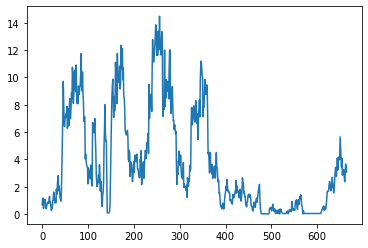

In [14]:
plt.plot(range(len(df_y)), df_y, label='history')

In [15]:
# 定义一个新的评价函数
def ev(y_true, y_predict):
    difference=(abs(np.array(y_true) - np.array(y_predict.flatten()))).sum()
    return float(difference) 

In [16]:

def build_model(size):
    tf.random.set_seed(1) #设置随机数种子
    # Create grid_model
    grid_model = tf.keras.Sequential()
    grid_model.add(tf.keras.layers.LSTM(units=64))
    grid_model.add(tf.keras.layers.Dense(64))
    grid_model.add(tf.keras.layers.Dense(size))
    grid_model.add(tf.keras.layers.Dense(1))

    # Compile the grid_model
    grid_model.compile(
    optimizer='adam',
    loss='mse')
    
    return grid_model

In [17]:
bestscore=1000
bestmodel=[]
flag=0


In [18]:
i=0
best_size=0
best_batch_size=0
best_epochs=0
for size in [32,64]:
    for batch_size in [16,24,32]:
        for epochs in range(32,64,2):
            grid_model=build_model(size)
            grid_model.fit(
            train_X, train_y,
            validation_data=(valid_X, valid_y),
            batch_size=32,
            epochs=epochs,
            verbose=0)
            pred_valid_y = grid_model.predict(valid_X)
            score=ev(valid_y,pred_valid_y)
            print(score,'num:',i,'size=',size,'batch_size=',batch_size,'epochs=',epochs)
            i=i+1
            if score<bestscore:
                flag=1
                bestscore=score
                best_size=size
                best_batch_size=batch_size
                best_epochs=epochs
                # Export the model to a SavedModel
                grid_model.save('keras_model_tf_version', save_format='tf')
print(bestscore,'best_size=',best_size,'best_batch_size=',best_batch_size,'best_epochs=',best_epochs)

3.4005179791020264 num: 0 size= 32 batch_size= 16 epochs= 32


INFO:tensorflow:Assets written to: keras_model_tf_version\assets


INFO:tensorflow:Assets written to: keras_model_tf_version\assets


4.5389703551910525 num: 1 size= 32 batch_size= 16 epochs= 34
2.6571614834099377 num: 2 size= 32 batch_size= 16 epochs= 36


INFO:tensorflow:Assets written to: keras_model_tf_version\assets


INFO:tensorflow:Assets written to: keras_model_tf_version\assets


2.989292898139901 num: 3 size= 32 batch_size= 16 epochs= 38
2.6889037823592 num: 4 size= 32 batch_size= 16 epochs= 40
2.7913304211963013 num: 5 size= 32 batch_size= 16 epochs= 42
2.801465089843978 num: 6 size= 32 batch_size= 16 epochs= 44
2.733461309891471 num: 7 size= 32 batch_size= 16 epochs= 46
3.168476664975202 num: 8 size= 32 batch_size= 16 epochs= 48
3.305146702578776 num: 9 size= 32 batch_size= 16 epochs= 50
5.030162937757289 num: 10 size= 32 batch_size= 16 epochs= 52
4.1521066568024665 num: 11 size= 32 batch_size= 16 epochs= 54
5.403505444439495 num: 12 size= 32 batch_size= 16 epochs= 56
5.653913172813846 num: 13 size= 32 batch_size= 16 epochs= 58
4.717168590599812 num: 14 size= 32 batch_size= 16 epochs= 60
3.9417656044092 num: 15 size= 32 batch_size= 16 epochs= 62
3.4005179791020264 num: 16 size= 32 batch_size= 24 epochs= 32
4.5389703551910525 num: 17 size= 32 batch_size= 24 epochs= 34
2.6571614834099377 num: 18 size= 32 batch_size= 24 epochs= 36
2.989292898139901 num: 19 size

INFO:tensorflow:Assets written to: keras_model_tf_version\assets


INFO:tensorflow:Assets written to: keras_model_tf_version\assets


2.7217546441932834 num: 51 size= 64 batch_size= 16 epochs= 38
2.5843609515955883 num: 52 size= 64 batch_size= 16 epochs= 40


INFO:tensorflow:Assets written to: keras_model_tf_version\assets


INFO:tensorflow:Assets written to: keras_model_tf_version\assets


3.177884534243751 num: 53 size= 64 batch_size= 16 epochs= 42
2.869068502015792 num: 54 size= 64 batch_size= 16 epochs= 44
3.5835940051342297 num: 55 size= 64 batch_size= 16 epochs= 46
3.049584546296362 num: 56 size= 64 batch_size= 16 epochs= 48
2.7066878835374046 num: 57 size= 64 batch_size= 16 epochs= 50
4.6299679051021 num: 58 size= 64 batch_size= 16 epochs= 52
3.4511261636348207 num: 59 size= 64 batch_size= 16 epochs= 54
4.74916566647804 num: 60 size= 64 batch_size= 16 epochs= 56
4.863487094506107 num: 61 size= 64 batch_size= 16 epochs= 58
3.678637215286072 num: 62 size= 64 batch_size= 16 epochs= 60
3.8995783095404177 num: 63 size= 64 batch_size= 16 epochs= 62
3.765983609273465 num: 64 size= 64 batch_size= 24 epochs= 32
4.069001498154498 num: 65 size= 64 batch_size= 24 epochs= 34
2.616185293408663 num: 66 size= 64 batch_size= 24 epochs= 36
2.7217546441932834 num: 67 size= 64 batch_size= 24 epochs= 38
2.5843609515955883 num: 68 size= 64 batch_size= 24 epochs= 40
3.177884534243751 num

In [19]:
# Recreate the exact same model
my_model = tf.keras.models.load_model('keras_model_tf_version')
new_pred_valid_y=my_model.predict(valid_X)
score=ev(valid_y,new_pred_valid_y)
score

2.5843609515955883

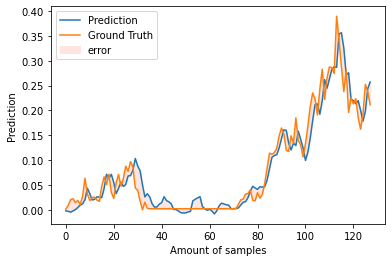

In [20]:
# 查看valid集预测结果
pred_valid_y = my_model.predict(valid_X)
plt.plot(range(len(pred_valid_y)), pred_valid_y, label='Prediction')
plt.plot(range(len(pred_valid_y)), valid_y, label='Ground Truth')
plt.fill_between(range(len(pred_valid_y)), pred_valid_y.flatten(), valid_y.flatten(), color='MistyRose',label='error')
plt.xlabel('Amount of samples')
plt.ylabel('Prediction')
plt.legend()
plt.show()

In [21]:
ev(valid_y,pred_valid_y)

2.5843609515955883

In [22]:
# %%
# Predicting
pred_y = my_model.predict(test_X)


In [23]:
pred_y.flatten()

array([-2.12248880e-03, -2.93985475e-03, -4.74690553e-03, -2.30859499e-03,
        3.55632976e-04,  4.43408825e-03,  9.58988164e-03,  1.20553412e-02,
        2.03046538e-02,  4.34735045e-02,  3.26063074e-02,  1.97546855e-02,
        2.11434066e-02,  2.60672122e-02,  2.56128572e-02,  2.45147832e-02,
        4.33637314e-02,  7.14951530e-02,  6.34269938e-02,  7.14113712e-02,
        5.48814610e-02,  3.25733274e-02,  4.29153629e-02,  5.59566505e-02,
        4.71250601e-02,  5.09729311e-02,  6.81361407e-02,  6.88067526e-02,
        7.95726329e-02,  1.03272237e-01,  8.83882642e-02,  7.85845667e-02,
        5.02117462e-02,  2.58974358e-02,  3.22629474e-02,  2.61872448e-02,
        1.24425106e-02,  5.42113883e-03,  5.55824954e-03,  1.12018231e-02,
        1.43674901e-02,  2.62634344e-02,  1.86981373e-02,  1.60817988e-02,
        1.19548133e-02,  7.69498292e-04,  6.39297999e-04, -2.40136590e-03,
       -5.78514952e-03, -6.42160885e-03, -6.17806800e-03, -4.39085346e-03,
       -3.04737780e-03,  

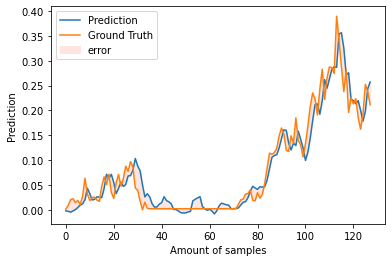

In [24]:
# %% Plotting
plt.plot(range(len(pred_y)), pred_y, label='Prediction')
plt.plot(range(len(pred_y)), test_y, label='Ground Truth')
plt.fill_between(range(len(pred_y)), pred_y.flatten(), test_y.flatten(), color='MistyRose',label='error')
plt.xlabel('Amount of samples')
plt.ylabel('Prediction')
plt.legend()
plt.show()
# %%

In [25]:
# # prediction of feature
# df_30_days_past=df.iloc[-7:,:]
# df_30_days_past.tail()
# df_30_days_future=pd.read_csv('.\\data\\FD001\\04 Fore_NWP_FD.csv',parse_dates=["Datetime"],index_col=[0])
# df_30_days_future
# df_30_days_future.shape
# df_30_days_future["Power(MW)"]=0
# df_30_days_future=df_30_days_future[["Speed10" , "Direction10" , "Speed30" , "Direction30" , "Speed50" , "Direction50" , "Speed70" , "Direction70" , "Speed90" , "Direction90" , "Speed100" , "Direction100" , "Temper" , "Pressure" , "Humidity" , "Power(MW)"]]
# old_scaled_array=scaler.transform(df_30_days_past)
# new_scaled_array=scaler.transform(df_30_days_future)
# new_scaled_df=pd.DataFrame(new_scaled_array)
# new_scaled_df.iloc[:,0]=np.nan
# full_df=pd.concat([pd.DataFrame(old_scaled_array),new_scaled_df]).reset_index().drop(["index"],axis=1)
# full_df_scaled_array=full_df.values
# all_data=[]
# time_step=7
# for i in range(time_step,len(full_df_scaled_array)):
#   data_x=[]
#   data_x.append(
#     full_df_scaled_array[i-time_step :i , 0:full_df_scaled_array.shape[1]])
#   data_x=np.array(data_x)
#   prediction=my_model.predict(data_x)
#   all_data.append(prediction)
#   full_df.iloc[i,0]=prediction
# new_array=np.array(all_data)
# new_array=new_array.reshape(-1,1)
# prediction_copies_array = np.repeat(new_array,16, axis=-1)
# y_pred_future_30_days = scaler.inverse_transform(np.reshape(prediction_copies_array,(len(new_array),16)))[:,0]
# print(y_pred_future_30_days)
# plt.plot(range(len(y_pred_future_30_days)), y_pred_future_30_days, label='Prediction')

In [26]:
# #绘制整体发电量图
# total = np.hstack((df_y,y_pred_future_30_days))
# plt.plot(range(len(total)), total, label='Prediction',color='coral')
# plt.plot(range(len(df_y)), df_y, label='Prediction')

In [27]:
# # prediction of feature
# df_30_days_past=df.iloc[-7:,:]
# df_30_days_past.tail()

In [28]:
# df_30_days_future=pd.read_csv('.\\data\\FD001\\04 Fore_NWP_FD.csv',parse_dates=["Datetime"],index_col=[0])
# df_30_days_future
# df_30_days_future.shape

In [29]:
# df_30_days_future["Power(MW)"]=0

In [30]:
# df_30_days_future

In [31]:
# df_30_days_future=df_30_days_future[["Speed10" , "Direction10" , "Speed30" , "Direction30" , "Speed50" , "Direction50" , "Speed70" , "Direction70" , "Speed90" , "Direction90" , "Speed100" , "Direction100" , "Temper" , "Pressure" , "Humidity" , "Power(MW)"]]

In [32]:
# old_scaled_array=scaler.transform(df_30_days_past)

In [33]:
# old_scaled_array.shape

In [34]:
# new_scaled_array=scaler.transform(df_30_days_future)

In [35]:
# new_scaled_array.shape

In [36]:

# new_scaled_df=pd.DataFrame(new_scaled_array)
# new_scaled_df.iloc[:,0]=np.nan
# full_df=pd.concat([pd.DataFrame(old_scaled_array),new_scaled_df]).reset_index().drop(["index"],axis=1)

In [37]:
# full_df.shape

In [38]:
# full_df_scaled_array=full_df.values
# all_data=[]
# time_step=7
# for i in range(time_step,len(full_df_scaled_array)):
#   data_x=[]
#   data_x.append(
#     full_df_scaled_array[i-time_step :i , 0:full_df_scaled_array.shape[1]])
#   data_x=np.array(data_x)
#   prediction=grid_model.predict(data_x)
#   all_data.append(prediction)
#   full_df.iloc[i,0]=prediction

In [39]:
# new_array=np.array(all_data)
# new_array=new_array.reshape(-1,1)
# prediction_copies_array = np.repeat(new_array,16, axis=-1)
# y_pred_future_30_days = scaler.inverse_transform(np.reshape(prediction_copies_array,(len(new_array),16)))[:,0]
# print(y_pred_future_30_days)

In [40]:
# plt.plot(range(len(y_pred_future_30_days)), y_pred_future_30_days, label='Prediction')